<a href="https://colab.research.google.com/github/GustavOnaga/GustavOnaga/blob/main/Tech_Challenge_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O problema**

Você foi recentemente alocado em uma equipe de cientistas de dados de
um grande fundo de investimentos brasileiro. **Sua missão inicial é desenvolver
um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta
ou baixa no dia seguinte, com base em dados históricos do próprio índice.** Esse
modelo será usado como insumo para alimentar dashboards internos de tomada
de decisão dos analistas quantitativos da empresa.

### **Dados**
Utilize os dados históricos do índice IBOVESPA, disponíveis
publicamente: https://br.investing.com/indices/bovespa-historical-data

**Requisitos:**

*  Selecione o período “diário”
*  Baixe um intervalo de pelo menos 2 anos de dados.
*  Realize o pré-processamento necessário para utilizar os dados no
modelo.

### **Objetivo**
Criar um modelo que preveja se o fechamento do IBOVESPA do dia
seguinte será maior ou menor que o do dia atual.

### **Observações**
Seu modelo deve prever a tendência (↑ ou ↓) com **acuracidade mínima
de 75%** em um conjunto de teste. O conjunto de testes deverá conter o último
mês (30 dias) de dados disponíveis.





---



### Analise exploratoria

In [ ]:
#Importação das principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Dados Históricos - Ibovespa.csv')
print(df.shape)
df.head(5)

(499, 7)


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,04.06.2025,137.002,137.547,138.797,136.695,"10,20B","-0,40%"
1,03.06.2025,137.546,136.787,137.672,136.175,"9,70B","0,56%"
2,02.06.2025,136.787,137.026,138.471,136.483,"9,10B","-0,18%"
3,30.05.2025,137.027,138.546,138.637,136.726,"15,14B","-1,09%"
4,29.05.2025,138.534,138.869,139.108,137.993,"8,83B","-0,25%"


In [ ]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,499.000000,499.000000,499.000000,499.000000
mean,125.958741,125.910299,126.733513,125.176974
std,6.206161,6.215017,6.175534,6.217346
min,112.532000,112.534000,113.071000,111.599000
25%,120.767000,120.763500,121.736000,120.155000
50%,126.922000,126.923000,127.657000,126.065000
75%,130.111000,130.051000,130.783500,129.348500
max,140.110000,140.109000,140.382000,138.966000


In [ ]:
#Ajuste dos cabeçalhos das colunas
df.rename(columns={'Data':'data','Último':'ultimo','Abertura':'abertura','Máxima':'maxima','Mínima':'minima','Vol.':'vol','Var%':'var'}, inplace = True)

In [ ]:
df.dtypes

,0
data,object
ultimo,float64
abertura,float64
maxima,float64
minima,float64
vol,object
var,object


Ao observar os tipos das colunas, podemos notar que será necessario alterar as colunas "data" para formate date, enquanto que as coluna "vol" e "var" para o formato float.

In [ ]:
#Analise da coluna de vol
df['vol'].str[-1].unique().tolist()

['B', 'M']

Ao extrair os ultimos caracteres e transforma-los numa lista unica, podemos que que temos apenas as unidade de Bilhão e Milhão.

In [ ]:
#Ajuste da coluna "vol"
def ajusteVol(valor):
    if valor[-1] == 'M':
        return float(valor[:-1].replace(',', '.')) * 1_000_000
    elif valor[-1] == 'B':
        return float(valor[:-1].replace(',', '.')) * 1_000_000_000
    else:
        return float(valor.replace(',', '.'))

# Aplicar à coluna
df['vol'] = df['vol'].apply(ajusteVol)

In [ ]:
#Ajuste das coluna "data" e "var"
df['data'] = pd.to_datetime(df['data'], format='%d.%m.%Y')
df['var'] = (df['var'].str.replace('%', '').str.replace(',', '.').astype(float))

print(df.dtypes)

data        datetime64[ns]
ultimo             float64
abertura           float64
maxima             float64
minima             float64
vol                float64
var                float64
dtype: object


In [ ]:
df.describe()

,data,ultimo,abertura,maxima,minima,vol,var
count,499,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000
mean,2024-06-02 09:54:28.136272640,125.958741,125.910299,126.733513,125.176974,2.233692e+09,0.043567
min,2023-06-05 00:00:00,112.532000,112.534000,113.071000,111.599000,4.330000e+06,-3.150000
25%,2023-12-02 12:00:00,120.767000,120.763500,121.736000,120.155000,8.940000e+06,-0.505000
50%,2024-06-05 00:00:00,126.922000,126.923000,127.657000,126.065000,1.057000e+07,0.030000
75%,2024-11-28 12:00:00,130.111000,130.051000,130.783500,129.348500,1.507000e+07,0.620000
max,2025-06-04 00:00:00,140.110000,140.109000,140.382000,138.966000,2.487000e+10,3.120000
std,NaN,6.206161,6.215017,6.175534,6.217346,4.535854e+09,0.911987


In [ ]:
df.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
vol,0
var,0


Ao observar os valores nulos, é possivel notar que não há presença de dados nulos na base

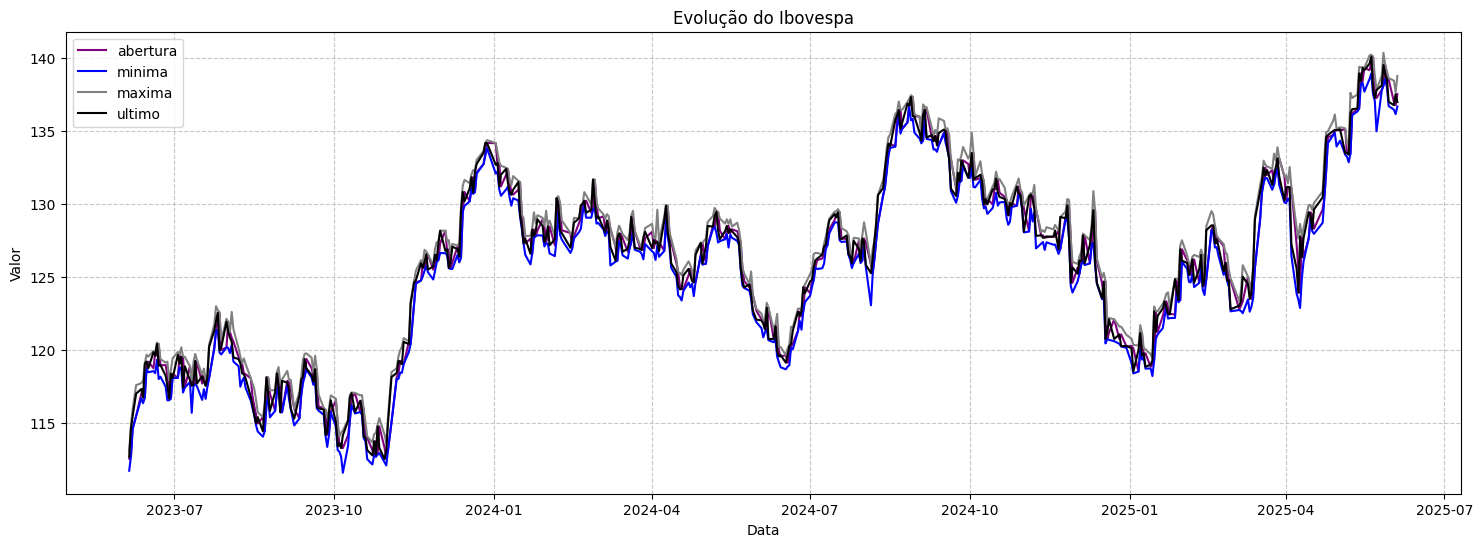

In [ ]:
#criando a figura
plt.figure(figsize = (18,6))

sns.lineplot(data = df,x = 'data', y = 'abertura',color = 'purple',label = 'abertura')
sns.lineplot(data = df,x='data',y='minima', color = 'blue', label = 'minima')
sns.lineplot(data = df,x='data',y='maxima', color = 'gray', label = 'maxima')
sns.lineplot(data = df,x='data',y='ultimo', color = 'black', label = 'ultimo')


plt.title('Evolução do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(linestyle ='--', alpha = 0.7)
plt.legend()

Ao observar o grafico, é possivel notar que os valores da ibovespa apresenta uma tendencia de crescimento por "queda", ou seja, ela vai subindo e caindo, porem com uma tendencia sempre maior que o ano anterior.

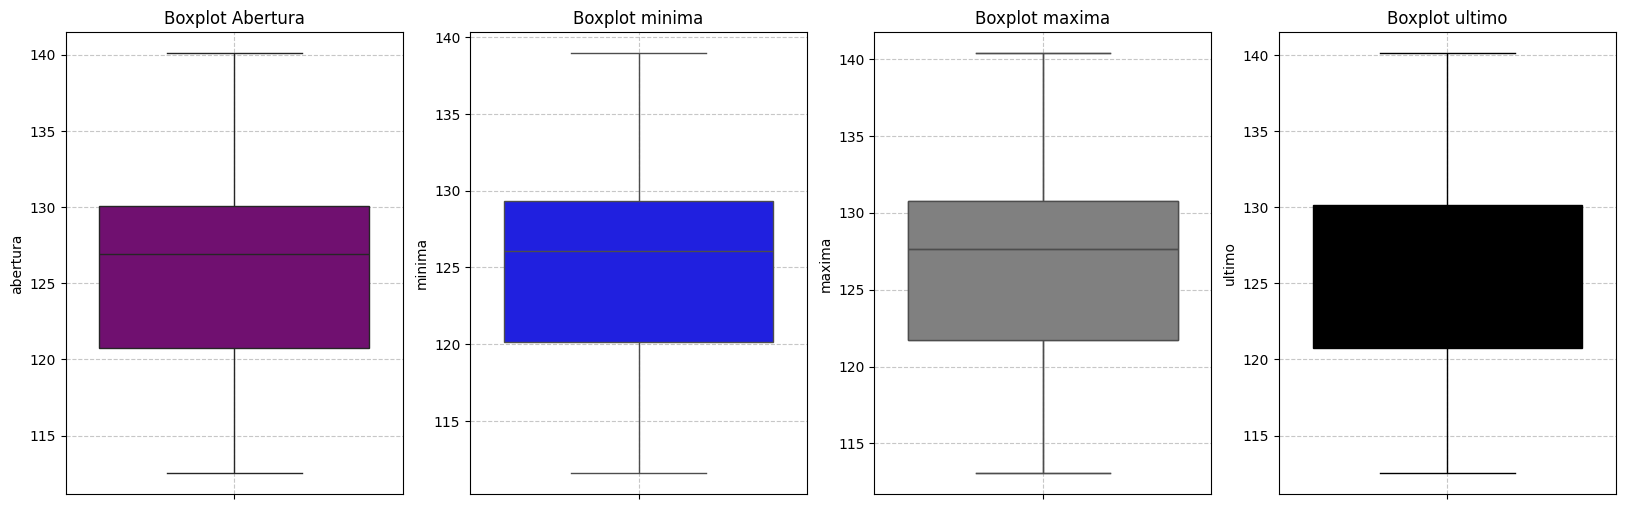

In [ ]:
#Criando a imagem
fig, axs = plt.subplots(1,4, figsize=(20, 6))

sns.boxplot(data = df, y = 'abertura',ax = axs[0], color = 'purple')
axs[0].set_title('Boxplot Abertura')
axs[0].grid(linestyle ='--', alpha = 0.7)

sns.boxplot(data = df, y = 'minima',ax = axs[1], color = 'blue')
axs[1].set_title('Boxplot minima')
axs[1].grid(linestyle ='--', alpha = 0.7)

sns.boxplot(data = df, y = 'maxima',ax = axs[2], color = 'gray')
axs[2].set_title('Boxplot maxima')
axs[2].grid(linestyle ='--', alpha = 0.7)

sns.boxplot(data = df, y = 'maxima',ax = axs[2], color = 'gray')
axs[2].set_title('Boxplot maxima')
axs[2].grid(linestyle ='--', alpha = 0.7)

sns.boxplot(data = df, y = 'ultimo',ax = axs[3], color = 'black')
axs[3].set_title('Boxplot ultimo')
axs[3].grid(linestyle ='--', alpha = 0.7)

Ao observar os boxplots, é possivel notar que não há a presença de outliers para as informações de valores de abertura, minimo e maximo do ibovespa

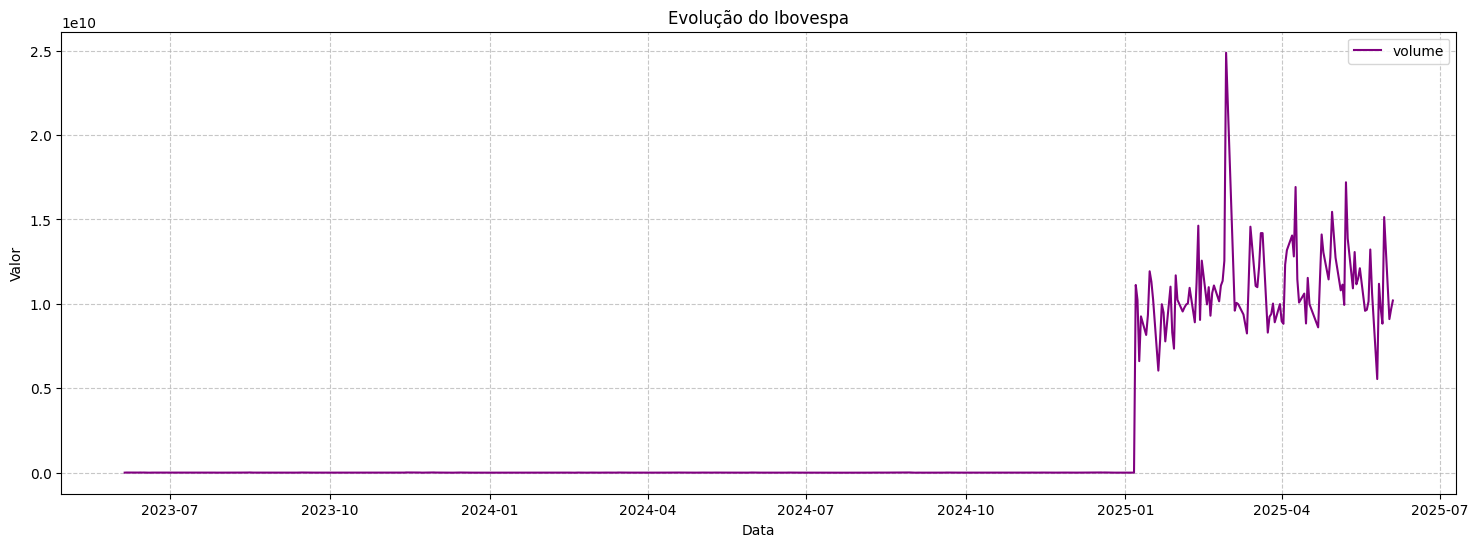

In [ ]:
#criando a figura
plt.figure(figsize = (18,6))

sns.lineplot(data = df,x = 'data', y = 'vol',color = 'purple',label = 'volume')

plt.title('Evolução do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(linestyle ='--', alpha = 0.7)
plt.legend()

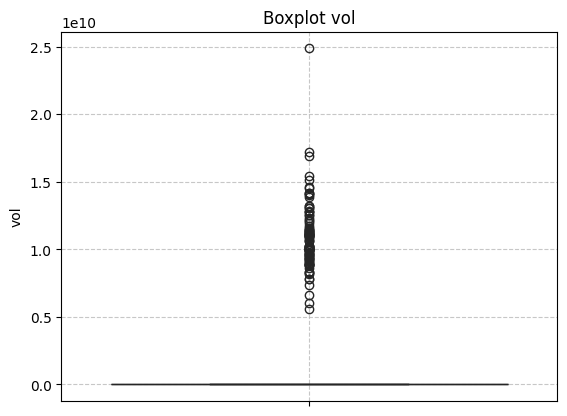

In [ ]:
#Criando a imagem
figure = figsize=(20, 6)

sns.boxplot(data = df, y = 'vol', color = 'purple')
plt.title('Boxplot vol')
plt.grid(linestyle ='--', alpha = 0.7)

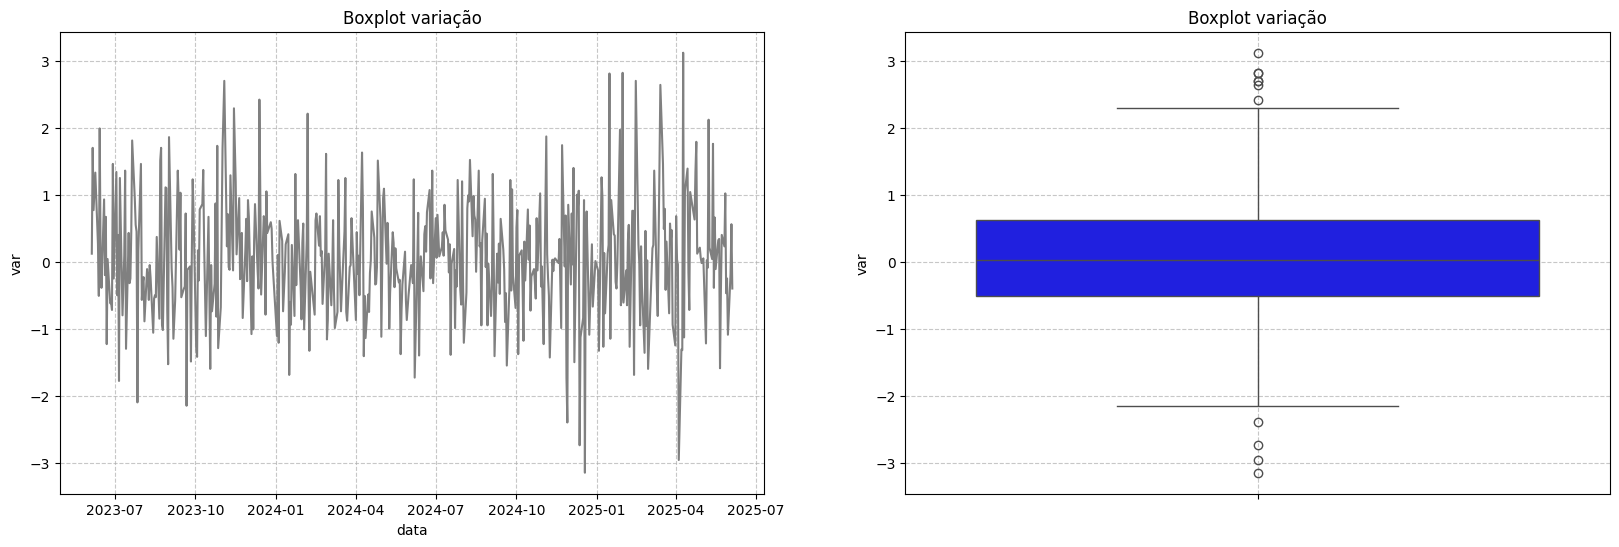

In [ ]:
#Criando a imagem
fig, axs = plt.subplots(1,2, figsize=(20, 6))

sns.lineplot(data = df,x='data',y='var',ax = axs[0], color = 'gray')
axs[0].set_title('Boxplot variação')
axs[0].grid(linestyle ='--', alpha = 0.7)


sns.boxplot(data = df, y = 'var',ax = axs[1], color = 'blue')
axs[1].set_title('Boxplot variação')
axs[1].grid(linestyle ='--', alpha = 0.7)

Ao observar as informações de variação, é possivel notar a presença de outliers